## IMSA training by Ekwacu Samuel (ekwacu@gmail.com) 

 Plotting seasonal RFE by Samuel and Udeni 

In [18]:
import xarray as xr
import numpy as np
import cmocean # for perceptually uniform colormaps
import cartopy as cr # for geographic mapping
import cartopy.crs as ccrs # for map projections
import matplotlib.pyplot as plt # plotting tool
import cartopy.feature as cfeature # to add coastlines, land and ocean
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from descartes import PolygonPatch
import matplotlib.path as mplPath
from shapely.geometry.polygon import Polygon
import geopandas as gpd
import shapefile as shp
import regionmask

In [19]:
chirps = xr.open_dataset('D:/Folder_2023/Research/Udeni/CHIRPS_monthly_1981-2021.nc')
#chirps

In [20]:
obs_clim = chirps.sel(time=slice("1981-01-16", "2021-12-16"))

In [21]:
####For seasonal analysis
obs_seas = obs_clim.groupby('time.season')
## The seasons to plot over
obs_djf = obs_seas['DJF'].mean('time')
obs_mam = obs_seas['MAM'].mean('time')
obs_jja = obs_seas['JJA'].mean('time')
obs_son = obs_seas['SON'].mean('time')
#obs_son

In [22]:
obs_yrs = (obs_djf + obs_mam + obs_jja + obs_son)
#obs_yrs

In [23]:
##Read the shapefile
sf2 = shp.Reader('D://Folder_2023//GIS_DATA//Sirlanka//LKA_adm//LKA_adm1.shp')

C:\Users\Samuel-NUIST\AppData\Local\Temp\ipykernel_3416\2766722837.py:21: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)


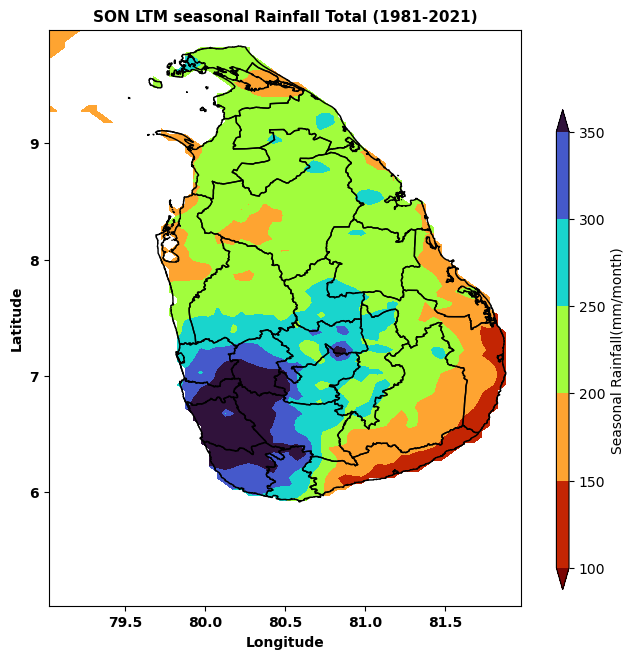

In [24]:
from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig, ax = plt.subplots(constrained_layout=True, figsize=(7, 8))

## Plotting the figure
for poly in sf2.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))
    
#cs = plt.contourf(obs_son.longitude, obs_son.latitude, obs_son.precip, cmap=plt.cm.RdYlBu, levels=np.arange(20, 200, 20), extend='both')
cs = plt.contourf(obs_son.longitude, obs_son.latitude, obs_son.precip, cmap=plt.cm.turbo_r, levels=np.arange(100, 400, 50), extend='both')
#cs = plt.contourf(obs_yrs.longitude, obs_yrs.latitude, obs_yrs.precip, cmap=plt.cm.viridis_r, levels=np.arange(450, 1300, 100), extend='both')
## title attributes
plt.title('SON LTM seasonal Rainfall Total (1981-2021)',fontsize=11, fontweight='bold')
plt.xticks(size = 10, fontweight='bold')
plt.yticks(size = 10, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=10, fontweight='bold')
plt.xlabel('Longitude',fontsize=10, fontweight='bold')
##ploting the legend
plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)
###color bar
fig.colorbar(cs, ax=ax,cax = plt.axes([0.85, 0.1, 0.018, 0.6]), label='Seasonal Rainfall(mm/month)')

# save output
#plt.savefig('D:/Folder_2023/Research/Udeni/son_ltm.png')
plt.show()

### Ploting counts Greater than 30mm per day 

In [25]:
chirps = xr.open_dataset('D:/Folder_2023/Research/Udeni/chirps_counts1-30mm_1981-2021.nc')
#chirps

In [26]:
obs_clim = chirps.sel(time=slice("1981-01-16", "2021-12-16"))

In [27]:
####For seasonal analysis
obs_seas = obs_clim.groupby('time.season')
## The seasons to plot over
obs_djf = obs_seas['DJF'].mean('time')
obs_mam = obs_seas['MAM'].mean('time')
obs_jja = obs_seas['JJA'].mean('time')
obs_son = obs_seas['SON'].mean('time')
#obs_son

In [28]:
obs_yrs = (obs_djf + obs_mam + obs_jja + obs_son)
#obs_yrs

In [29]:
##Read the shapefile
sf2 = shp.Reader('D://Folder_2023//GIS_DATA//Sirlanka//LKA_adm//LKA_adm1.shp')

C:\Users\Samuel-NUIST\AppData\Local\Temp\ipykernel_3416\3824556731.py:19: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)


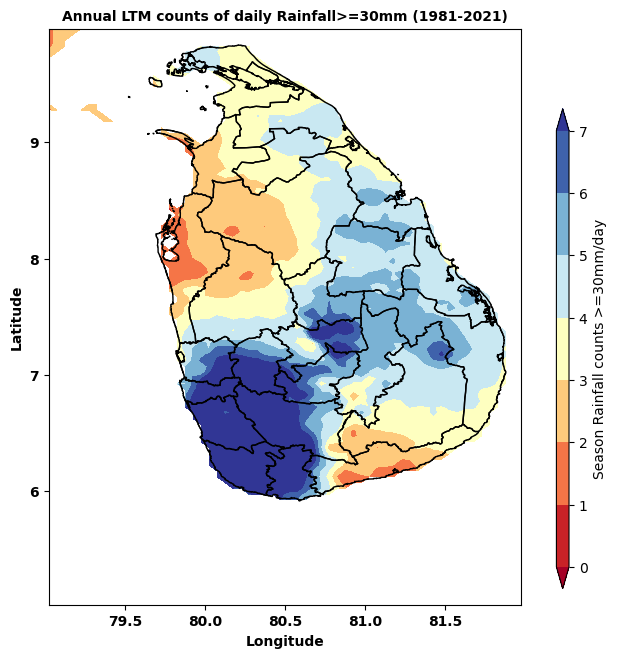

In [30]:
from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig, ax = plt.subplots(constrained_layout=True, figsize=(7, 8))

## Plotting the figure
for poly in sf2.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))
    
cs = plt.contourf(obs_yrs.Lon, obs_yrs.Lat, obs_yrs.precip, cmap=plt.cm.RdYlBu, levels=np.arange(0, 8, 1), extend='both')
## title attributes
plt.title('Annual LTM counts of daily Rainfall>=30mm (1981-2021)',fontsize=10, fontweight='bold')
plt.xticks(size = 10, fontweight='bold')
plt.yticks(size = 10, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=10, fontweight='bold')
plt.xlabel('Longitude',fontsize=10, fontweight='bold')
##ploting the legend
plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)
###color bar
fig.colorbar(cs, ax=ax,cax = plt.axes([0.85, 0.1, 0.018, 0.6]), label='Season Rainfall counts >=30mm/day')

# save output
#plt.savefig('D:/Folder_2023/Research/Udeni/Annual_counts_30mm_ltm.png')
plt.show()

### Plotting XY plot for counts of Rainy days >=30mm 

In [31]:
#Import the necessary libraries to enable us perform our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
RFE_mon = pd.read_csv('D:/Folder_2023/Research/Udeni/CHIRPS_monthly_counts-30mm_1981-2021_Sirlanka_plot.csv')
#RFE_mon  ## Prints out a sample of the data         
#RFE_mon.info()      ## describe your data
RFE_mon.columns     ## Check the column headers
#RFE_mon.shape       ## Check the number of rows and columns
#RFE_mon.describe()  ## Get summary statistics about your data
#RFE_mon[["Badulla"]].describe()  ## Summary statistics on particular columns as a dataframe
#RFE_mon["Ratnapura"].describe()  ## Summary statistics on particular columns as a series
#RFE_mon.sort_values(by="Anuradhapura", ascending = False) ## Sort the data in descending order

Index(['Years', 'Anuradhapura', 'Badulla', 'Batticaloa', 'Colombo', 'Galle',
       'Hambantota', 'Katugastota', 'Katunayake', 'Kurunagala', 'MI', 'Nuwara',
       'Puttalam', 'Ratmalana', 'Ratnapura', 'Trincomalee'],
      dtype='object')

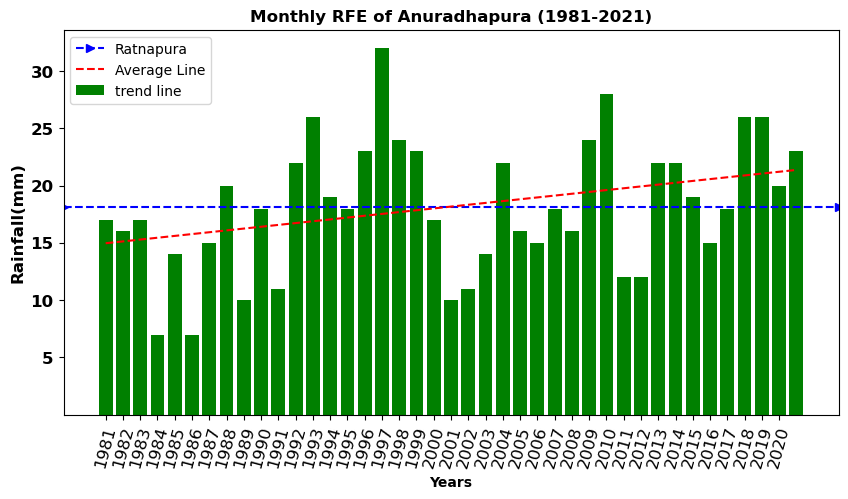

In [33]:
fig = plt.figure(figsize=(10,5))
df = pd.DataFrame(RFE_mon,columns=['Years','Ratnapura'])
plt.bar(df['Years'], df['Ratnapura'], color='green')#, marker='o')
plt.yticks(np.arange(5, 35, 5), fontsize=12, fontweight='bold')
plt.xticks(np.arange(1981, 2021, 1),fontsize=12,rotation=75)# fontweight='bold', rotation=75)
plt.title('Monthly RFE of Anuradhapura (1981-2021)', fontsize=12, fontweight='bold')
plt.xlabel('Years', fontsize=10, fontweight='bold')
plt.ylabel('Rainfall(mm)', fontsize=12, fontweight='bold')
plt.axhline(y = 18.170732, color = 'blue', linestyle = '--', marker='>')
z = np.polyfit(df['Years'], df['Ratnapura'], 1)
p = np.poly1d(z)
plt.plot(df['Years'],p(df['Years']),"r--")
plt.legend(['Ratnapura', 'Average Line', 'trend line'], loc = 'upper left')
#plt.grid(True)
#plt.savefig('D:/Folder_2023/Research/Udeni/Ratnapura_MJJAS_counts_30mm.png')
plt.show()

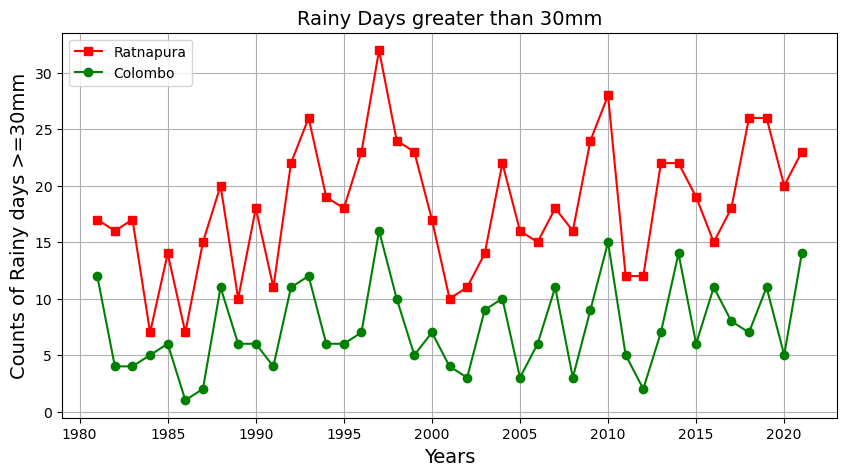

In [34]:
fig = plt.figure(figsize=(10,5))
df = pd.DataFrame(RFE_mon,columns=['Years','Ratnapura'])
df1 = pd.DataFrame(RFE_mon,columns=['Years','Colombo'])
plt.plot(df['Years'], df['Ratnapura'], color='red', marker='s')
plt.plot(df['Years'], df1['Colombo'], color='green', marker='o')
plt.title('Rainy Days greater than 30mm', fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Counts of Rainy days >=30mm', fontsize=14)
plt.legend(['Ratnapura', 'Colombo'],loc = 'upper left')
plt.grid(True)
#plt.savefig('D:/Folder_2023/Research/Udeni/Ratnapura_MJJAS_counts_30mm-compare.png')
plt.show()

### God's Fovarite